In [1]:
import numpy as np # for numerical operations
import matplotlib.pyplot as plt # for data visualization
from sklearn.model_selection import train_test_split # for splitting data into training and validation sets
import tensorflow as tf # for building and training machine learning models
from tensorflow.keras import Sequential, layers, Input # for importing necessary modules from TensorFlow's Keras API
from tensorflow.keras.datasets import fashion_mnist # for importing the Fashion MNIST dataset
from tensorflow.keras import models # for importing the models module

def preprocess_fashion_mnist():
    # Load Fashion MNIST dataset
    (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

    # Normalizing the images to range [0, 1] and reshaping them
    x_train = x_train.astype('float32') / 255.0
    x_test = x_test.astype('float32') / 255.0
    x_train = x_train.reshape((-1, 28, 28, 1))
    x_test = x_test.reshape((-1, 28, 28, 1))

    # Split the training data into training and validation sets
    x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.3, random_state=42)

    # Return the preprocessed datasets
    return x_train, y_train, x_val, y_val, x_test, y_test

# Checking for Data Set issues - Missing and Duplicate Values

def check_dataset_issues(x_train, x_test):
    # Check for missing values
    if np.any(np.isnan(x_train)) or np.any(np.isnan(x_test)):
        print("Dataset contains missing values.")
        print("Missing values found in:", end=" ")
        if np.any(np.isnan(x_train)):
            print("x_train", end=" ")
        if np.any(np.isnan(x_test)):
            print("x_test", end=" ")
        print()
        raise ValueError("Missing values detected in the dataset.")
    else:
        print("No missing values in the dataset.")

    # Check for duplicate values
    train_unique_count = len(np.unique(x_train.reshape(-1, 28 * 28 * 1), axis=0))
    test_unique_count = len(np.unique(x_test.reshape(-1, 28 * 28 * 1), axis=0))
    if train_unique_count < len(x_train):
        print(f"Duplicate values found in x_train: {len(x_train) - train_unique_count}")
    else:
        print("No duplicate values in x_train.")

    if test_unique_count < len(x_test):
        print(f"Duplicate values found in x_test: {len(x_test) - test_unique_count}")
    else:
        print("No duplicate values in x_test.")

# Preprocess the Fashion MNIST dataset
x_train, y_train, x_val, y_val, x_test, y_test = preprocess_fashion_mnist()

# Check for issues in the dataset
check_dataset_issues(x_train, x_test)

No missing values in the dataset.
No duplicate values in x_train.
No duplicate values in x_test.


Epoch 1/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.6817 - loss: 0.8482 - val_accuracy: 0.8553 - val_loss: 0.3941
Epoch 2/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8697 - loss: 0.3511 - val_accuracy: 0.8873 - val_loss: 0.3019
Epoch 3/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 25s 38ms/step - accuracy: 0.8965 - loss: 0.2810 - val_accuracy: 0.9038 - val_loss: 0.2676
Epoch 4/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 24s 37ms/step - accuracy: 0.9097 - loss: 0.2432 - val_accuracy: 0.9119 - val_loss: 0.2417
Epoch 5/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9206 - loss: 0.2093 - val_accuracy: 0.9113 - val_loss: 0.2484
Epoch 6/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.9271 - loss: 0.1918 - val_accuracy: 0.9149 - val_loss: 0.2347
Epoch 7/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.9381 - loss: 0.1664 - val_accuracy: 0.9183 - val_loss: 0.2224
Epoch 8/14
657/657 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.9464 - loss: 0.1434 - 

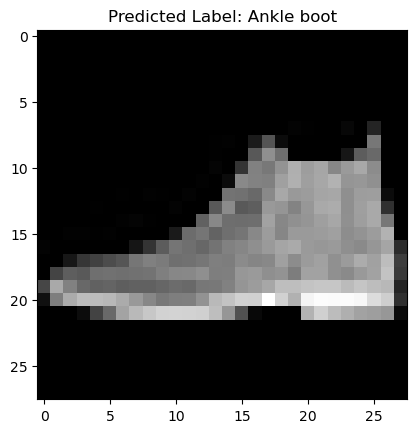

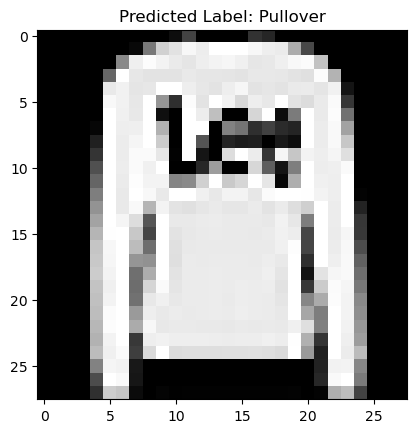

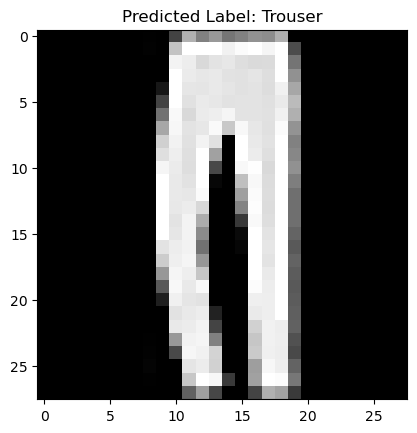

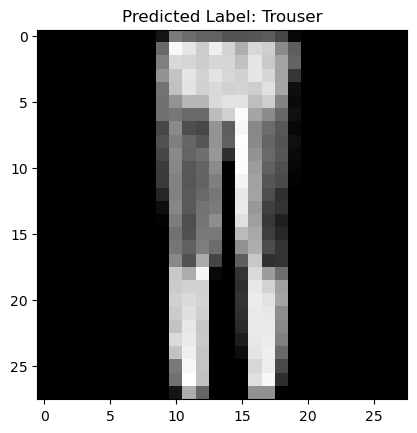

In [7]:
# Defining Fashion MNIST class names
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", 
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class FashionMNISTModel:
    def __init__(self, input_shape=(28, 28, 1), num_classes=10):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self._build_model()

    def _build_model(self):
        model = Sequential()
        model.add(Input(shape=self.input_shape)) # Adding input layer
    
        # Construction of Convolutional Layers with padding
        model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same')) #1st Layer
        model.add(tf.keras.layers.MaxPooling2D((2, 2)))
        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same')) # 2nd Layer
        model.add(tf.keras.layers.MaxPooling2D((2, 2)))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')) # 3rd Layer
        model.add(tf.keras.layers.MaxPooling2D((2, 2)))
        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same')) # 4th Layer
        model.add(tf.keras.layers.MaxPooling2D((2, 2)))

        model.add(tf.keras.layers.Flatten()) # Flatten Layer        
        model.add(tf.keras.layers.Dense(128, activation='relu')) # Fully Connected Layer        
        model.add(tf.keras.layers.Dense(self.num_classes, activation='softmax')) # Output Layer
        
        # Compiling the model
        model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
        return model

    def train(self, x_train, y_train, x_val, y_val, batch_size=64, epochs=14):
        history = self.model.fit(x_train, y_train, 
                                 validation_data=(x_val, y_val), 
                                 batch_size=batch_size, 
                                 epochs=epochs)
        return history

    def evaluate(self, x_test, y_test):
        test_loss, test_accuracy = self.model.evaluate(x_test, y_test)
        print(f"Test Accuracy: {test_accuracy:.2f}")
        return test_loss, test_accuracy

    def predict(self, x_test):
        return self.model.predict(x_test)

# Main execution
if __name__ == "__main__":
    # Load and preprocess data
    x_train, y_train, x_val, y_val, x_test, y_test = preprocess_fashion_mnist()

    # Instantiate the model
    fashion_model = FashionMNISTModel()

    # Train the model
    fashion_model.train(x_train, y_train, x_val, y_val, batch_size=64, epochs=14)

    # Evaluate the model
    fashion_model.evaluate(x_test, y_test)


# Getting predictions for the first four test images
predictions = fashion_model.predict(x_test[:4])

# Display the images and their predicted labels
for i in range(4):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    predicted_label = class_names[np.argmax(predictions[i])]
    plt.title(f"Predicted Label: {predicted_label}")
    plt.show()